# Networks

In [64]:
import networkx as nx

### Undirected network

###### # Example 1

In [65]:
g = nx.Graph()

In [66]:
g.add_edge('A', 'B')
g.add_edge('B', 'C')

In [67]:
g.node(), g.edges()

(NodeView(('A', 'B', 'C')), EdgeView([('A', 'B'), ('B', 'C')]))

In [68]:
g['A']

AtlasView({'B': {}})

### Directed network

###### # Example 2

In [69]:
g = nx.DiGraph()

In [70]:
g.add_edge('A', 'B')
g.add_edge('B', 'C')

In [71]:
g.node(), g.edges()

(NodeView(('A', 'B', 'C')), OutEdgeView([('A', 'B'), ('B', 'C')]))

In [72]:
g['A']

AtlasView({'B': {}})

### Weighted network

###### # Example 3

In [73]:
g = nx.Graph()

In [74]:
g.add_edge('A', 'B', weight=6)
g.add_edge('B', 'C', weight=13)

In [75]:
g.node(), g.edges()

(NodeView(('A', 'B', 'C')), EdgeView([('A', 'B'), ('B', 'C')]))

In [76]:
g['A']

AtlasView({'B': {'weight': 6}})

### Signed network 

###### # Example 4

In [77]:
g = nx.Graph()

In [78]:
g.add_edge('A', 'B', sign='+')
g.add_edge('B', 'C', sign='-')

In [79]:
g.node(), g.edges()

(NodeView(('A', 'B', 'C')), EdgeView([('A', 'B'), ('B', 'C')]))

In [80]:
g['A']

AtlasView({'B': {'sign': '+'}})

### Multigraph

###### # Example 5

In [81]:
g = nx.MultiGraph()

In [82]:
g.add_edge('A', 'B', relation='friend')
g.add_edge('A', 'B', relation='neighbor')

1

In [83]:
g.node(), g.edges()

(NodeView(('A', 'B')), MultiEdgeDataView([('A', 'B'), ('A', 'B')]))

In [84]:
g['A']

AdjacencyView({'B': {0: {'relation': 'friend'}, 1: {'relation': 'neighbor'}}})

### Summary

![title](./media/graphs.png)

###### # Example 6

In [85]:
g = nx.Graph()

In [86]:
g.add_edge('A', 'B', weight=6, relation='family', sign='+')
g.add_edge('B', 'C', weight=13, relation='friend', sign='-')

In [87]:
g.edges()

EdgeView([('A', 'B'), ('B', 'C')])

In [88]:
g.edges(data=True)

EdgeDataView([('A', 'B', {'weight': 6, 'relation': 'family', 'sign': '+'}), ('B', 'C', {'weight': 13, 'relation': 'friend', 'sign': '-'})])

In [89]:
g.edges(data='relation')

EdgeDataView([('A', 'B', 'family'), ('B', 'C', 'friend')])

In [90]:
g.edges(data='weight')

EdgeDataView([('A', 'B', 6), ('B', 'C', 13)])

In [91]:
g.edges(data='sign')

EdgeDataView([('A', 'B', '+'), ('B', 'C', '-')])

In [92]:
g['A']

AtlasView({'B': {'weight': 6, 'relation': 'family', 'sign': '+'}})

In [93]:
g['A']['B']

{'weight': 6, 'relation': 'family', 'sign': '+'}

In [94]:
g['A']['B']['relation']

'family'

In [95]:
if (g['B']['A'] == g['A']['B']): print('OK: This is an UNdirected graph')

OK: This is an UNdirected graph


###### # Example 7

In [96]:
g = nx.DiGraph()

In [97]:
g.add_edge('A', 'B', weight=6, relation='family', sign='+')
g.add_edge('B', 'C', weight=13, relation='friend', sign='-')

In [98]:
g['A']['B']

{'weight': 6, 'relation': 'family', 'sign': '+'}

In [99]:
try:
    g['B']['A'] == g['A']['B']
except KeyError:
    print('ERROR: This is a DIRECTED GRAPH!')

ERROR: This is a DIRECTED GRAPH!


###### # Example 8

In [100]:
g = nx.MultiDiGraph()

In [101]:
g.add_edge('A', 'B', weight=6, relation='family', sign='+')
g.add_edge('B', 'C', weight=13, relation='friend', sign='-')

0

In [102]:
g['A']['B']

AtlasView({0: {'weight': 6, 'relation': 'family', 'sign': '+'}})

In [103]:
g['A']['B'][0]

{'weight': 6, 'relation': 'family', 'sign': '+'}

In [104]:
g['A']['B'][0]['relation']

'family'

In [105]:
try:
    g['B']['A']
except KeyError:
    print('ERROR: This is a DIRECTED GRAPH!')

ERROR: This is a DIRECTED GRAPH!


In [106]:
g.nodes()

NodeView(('A', 'B', 'C'))

In [107]:
g.edges(data=True)

OutMultiEdgeDataView([('A', 'B', {'weight': 6, 'relation': 'family', 'sign': '+'}), ('B', 'C', {'weight': 13, 'relation': 'friend', 'sign': '-'})])

### Bipartite Graph

In [108]:
from networkx.algorithms import bipartite

###### # Example 9

In [271]:
b = nx.Graph()

In [280]:
left = 'A B C D E'.split()
right = (1, 2, 3, 4)

In [281]:
b.add_nodes_from(left, bipartite=0)

In [282]:
b.add_nodes_from(right, bipartite=1)

In [283]:
b.nodes()

NodeView(('A', 'B', 'C', 'D', 'E', 1, 2, 3, 4))

In [284]:
b.add_edges_from([('A', 1), ('B', 1), ('C', 1), ('C', 3), ('D', 2), ('E', 3), ('E', 4)])

In [285]:
b.edges()

EdgeView([('A', 1), ('B', 1), ('C', 1), ('C', 3), ('D', 2), ('E', 3), ('E', 4)])

In [286]:
# checking for bipartite graph

In [287]:
bipartite.is_bipartite(b)

True

In [288]:
b.add_edge('A', 'B')

In [289]:
bipartite.is_bipartite(b)

False

In [290]:
b.remove_edge('A', 'B')

In [291]:
bipartite.is_bipartite(b)

True

In [292]:
# check if set is one bipartition

In [293]:
bipartite.is_bipartite_node_set(b, left)

True

In [303]:
bipartite.is_bipartite_node_set(b, right)

True

In [304]:
bipartite.is_bipartite_node_set(b, (1, 2, 3))

False

In [305]:
# FIXME
bipartite.sets(b)

AmbiguousSolution: Disconnected graph: Ambiguous solution for bipartite sets.

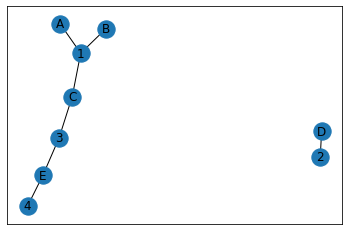

In [306]:
import matplotlib.pyplot as plt
nx.draw_networkx(b)
plt.show()

### Projected graphs

###### # Example 10

In [307]:
# TODO
# bipartite.projected_graph(B,X)

###### # Example 11

In [301]:
# TODO
# bipartite.wighted_projected_graph(B,X)